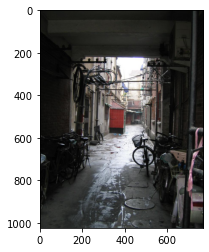

In [2]:
import matplotlib.pyplot as plt
import cv2
image1=plt.imread("manmade_training/sun_aawejawauhafqfcc.jpg")
plt.imshow(image1)
plt.show()

In [3]:
image1.shape

(1024, 768, 3)

In [4]:
image1=cv2.resize(image1,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
image1.shape

(128, 64, 3)

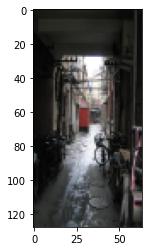

In [6]:
plt.imshow(image1)
plt.show()

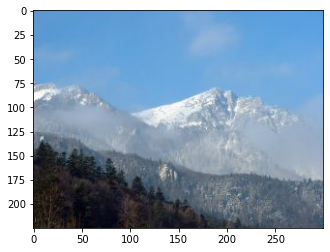

In [5]:
image2=plt.imread("natural_training/sun_bplxashdzhedycgw.jpg")
plt.imshow(image2)
plt.show()

In [6]:
image2.shape

(225, 300, 3)

In [7]:
image2=cv2.resize(image2,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
image2.shape

(128, 64, 3)

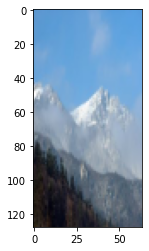

In [8]:
plt.imshow(image2)
plt.show()

In [7]:
from skimage.color import rgb2gray
image1=rgb2gray(image1)

In [8]:
from skimage.feature import hog
features1, hog_image1 = hog(image1, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)



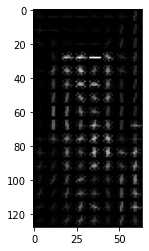

In [10]:
plt.imshow(hog_image1,cmap='gray')
plt.show()

In [12]:
features1.shape

(3780,)

In [13]:
image2=rgb2gray(image2)
features2, hog_image2 = hog(image2, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
features2.shape

(3780,)

In [14]:
features1=features1.reshape(1,len(features1))
features1.shape

(1, 3780)

In [11]:
import time
X_train=[]
Y_train=[]

In [12]:
with open('natural_training.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        image=cv2.resize(image,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
        image=rgb2gray(image)
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)
        #featuresReshape=features.reshape(1,len(features))
        X_train.append(features)
        Y_train.append(1)

In [13]:
import numpy as np
with open('manmade_training.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        image=cv2.resize(image,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
        if(image.dtype!=np.uint8):
            normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
            image = (normalized_image * 255).astype(np.uint8)
        image=rgb2gray(image)
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)
        #featuresReshape=features.reshape(1,len(features))
        X_train.append(features)
        Y_train.append(0)

In [14]:
print(len(X_train))
print(len(Y_train))

1000
1000


In [15]:
X_test=[]
Y_test=[]

In [16]:
with open('natural_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        image=cv2.resize(image,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
        image=rgb2gray(image)
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)
        #featuresReshape=features.reshape(1,len(features))
        X_test.append(features)
        Y_test.append(1)

In [17]:
with open('manmade_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        image=cv2.resize(image,dsize=[64,128],fx=None,fy=None,interpolation=cv2.INTER_AREA)
        image=rgb2gray(image)
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)
        #featuresReshape=features.reshape(1,len(features))
        X_test.append(features)
        Y_test.append(0)

In [18]:
print(len(X_test))
print(len(Y_test))

500
500


In [19]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)


In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 3780)
(1000,)
(500, 3780)
(500,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
start_time1 = time.time()

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

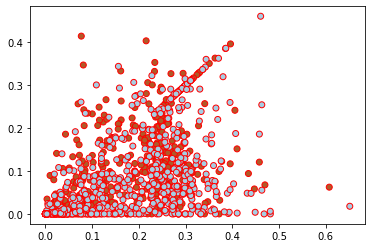

In [101]:
plt.scatter(np.array(X_train)[:, 0], np.array(X_train)[:, 1], c=Y_train, cmap=plt.cm.Paired, edgecolors='r')

In [34]:
Y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
end_time1 = time.time()
elapsed_time1 = end_time1 - start_time1

print(f"Computation time: {elapsed_time1} seconds")
print("Accuracy:", accuracy)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("true negative:", tn)
print("false positive:", fp/250)
print("false negative:", fn/250)
print("true positive:", tp)
print(Y_pred)

Computation time: 2.8271617889404297 seconds
Accuracy: 0.688
true negative: 105
false positive: 0.58
false negative: 0.044
true positive: 239
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 

In [29]:
from sklearn import svm
start_time2= time.time()
model=svm.SVC()
model.fit(X_train,Y_train)

SVC()

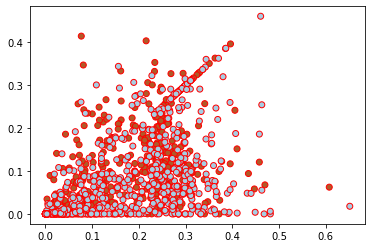

In [104]:
plt.scatter(np.array(X_train)[:, 0], np.array(X_train)[:, 1], c=Y_train, cmap=plt.cm.Paired, edgecolors='r')

In [30]:
Y_pred=model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
end_time2 = time.time()
elapsed_time2 = end_time2 - start_time2

print(f"Computation time: {elapsed_time2} seconds")
print("Accuracy:", accuracy)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("true negative:", tn)
print("false positive:", fp/250)
print("false negative:", fn/250)
print("true positive:", tp)
print(Y_pred)

Computation time: 3.510523557662964 seconds
Accuracy: 0.846
true negative: 208
false positive: 0.168
false negative: 0.14
true positive: 215
[1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0